Import the package 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Load data 

In [3]:
data  = pd.read_csv('DataSet/K6dWbZwmSXCnVm2cJklwng_867ace16e19e49ec88e68cc191e66af1_c4_epa_air_quality.csv', index_col=0)

data exploratory

In [4]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


In [7]:
data.describe(include="all")

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [9]:
population_mean = data['aqi'].mean()
population_mean

6.757692307692308

In [10]:
sample_data = data.sample(n=50,replace=True, random_state=20)
sample_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
223,2018-01-01,Maryland,Prince George's,Beltsville,HU-Beltsville,Carbon monoxide,Parts per million,0.183333,2
218,2018-01-01,California,Sonoma,Sebastopol,Sebastopol,Carbon monoxide,Parts per million,0.572222,8
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
162,2018-01-01,New Mexico,Bernalillo,Albuquerque,DEL NORTE HIGH SCHOOL,Carbon monoxide,Parts per million,0.247368,7
118,2018-01-01,Wyoming,Converse,Not in a city,Converse County Long-Term,Carbon monoxide,Parts per million,0.092308,1
40,2018-01-01,California,San Mateo,Redwood City,Redwood City,Carbon monoxide,Parts per million,0.672222,10
251,2018-01-01,Colorado,Denver,Denver,La Casa,Carbon monoxide,Parts per million,0.342105,5
253,2018-01-01,Oregon,Washington,Tualatin,Tualatin Bradbury Court (TBC) - Near Road Site,Carbon monoxide,Parts per million,0.100000,1
230,2018-01-01,California,Monterey,Salinas,Salinas 3,Carbon monoxide,Parts per million,0.552632,10
230,2018-01-01,California,Monterey,Salinas,Salinas 3,Carbon monoxide,Parts per million,0.552632,10


In [12]:
sample_mean = sample_data['aqi'].mean()
sample_mean

5.76

In [13]:
estimate_list = []
for i in range(10000):
    estimate_list.append(data['aqi'].sample(n =50, replace=True).mean())


In [14]:
estimate_df = pd.DataFrame(data={"estimate": estimate_list})
estimate_df.head()

,estimate
0,6.26
1,5.84
2,6.98
3,6.36
4,5.66


In [15]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.7701899999999995

<Axes: >

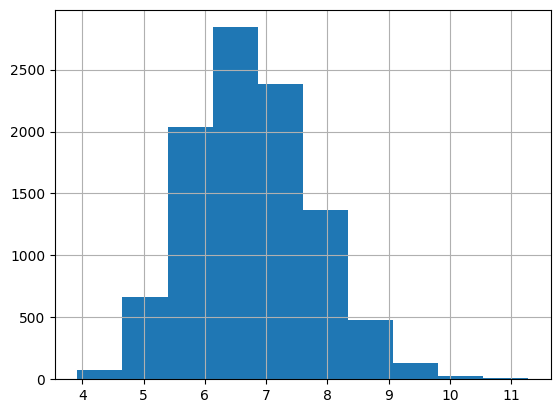

In [16]:
estimate_df['estimate'].hist()

In [18]:
standard_error = sample_data['aqi'].std()/ np.sqrt(len(sample_data))
standard_error

0.9118539088145691

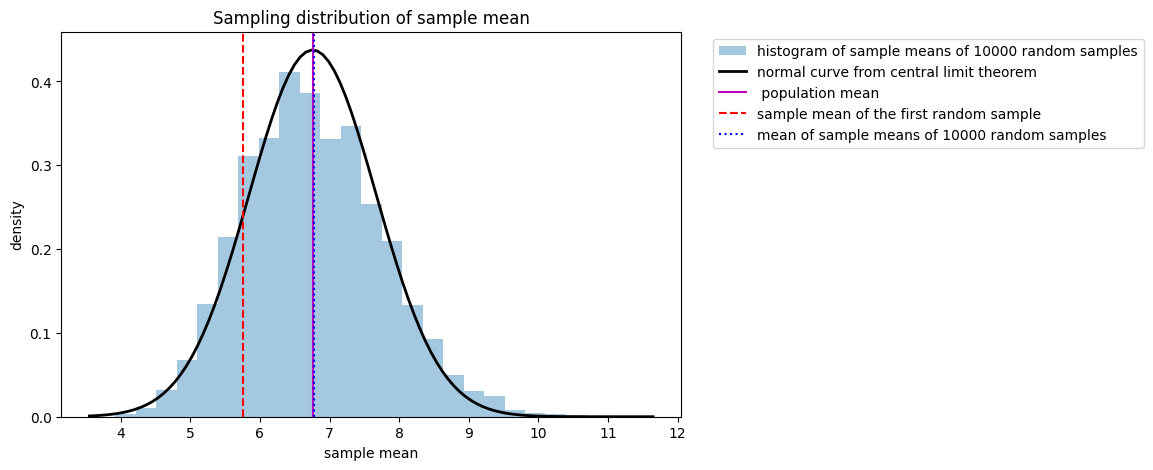

In [19]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25 , density=True, alpha= 0.4, label="histogram of sample means of 10000 random samples")
xmin, xmax  = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x,p, 'k', linewidth = 2, label = "normal curve from central limit theorem")
plt.axvline(x=population_mean, color='m', linestyle='solid', label=' population mean')
plt.axvline(x = sample_mean, color='r', linestyle='--', label= 'sample mean of the first random sample')
plt.axvline(x = mean_sample_means, color='b', linestyle=':', label='mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel("sample mean")
plt.ylabel("density")
plt.legend(bbox_to_anchor=(1.04,1))